<a href="https://colab.research.google.com/github/akashbilgi/DMT/blob/main/part3_final_dmt_correctness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/implementation_correctness_dataset.csv')

In [2]:
df

,Feature 1,Feature 2,Class/Cluster
0,0.020,0.000000,1
1,1.045,0.000000,1
2,2.080,0.000000,1
3,3.125,0.000000,1
4,4.180,0.000000,1
5,5.245,0.000000,1
6,6.320,0.000000,1
7,7.405,0.000000,1
8,8.500,0.000000,1
9,9.605,0.000000,1


#formatting values

In [3]:
df.iloc[:,-1]=df.iloc[:,-1].replace(2,-1)

In [4]:
df


,Feature 1,Feature 2,Class/Cluster
0,0.020,0.000000,1
1,1.045,0.000000,1
2,2.080,0.000000,1
3,3.125,0.000000,1
4,4.180,0.000000,1
5,5.245,0.000000,1
6,6.320,0.000000,1
7,7.405,0.000000,1
8,8.500,0.000000,1
9,9.605,0.000000,1


#Step 1:Show a scatterplot of the dataset including the test datapoint

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


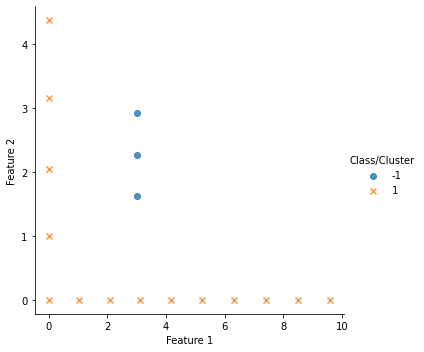

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot("Feature 1", "Feature 2", hue="Class/Cluster", data=df, fit_reg=False, markers=["o", "x"])
plt.show()

In [6]:
test_data=df
test_data.loc[len(test_data.index)]=[4,4,0]

## adding test data and replotting

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


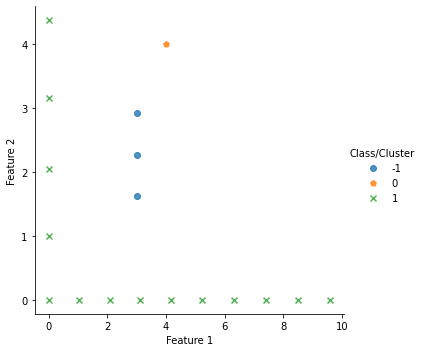

In [7]:
sns.lmplot("Feature 1", "Feature 2", hue="Class/Cluster", data=test_data, fit_reg=False, markers=['o','p','x'])
plt.show()

#SMV def 

In [8]:
import numpy as np


class SVM:
    def __init__(self, C=1.0):
        # C is the error term
        self.C = C
        self.weights = 0
        self.bias = 0

    # Hinge Loss Function / Calculation
    def hinge_loss(self, weights, bias, x, y):
        # Regularizer term
        reg = 0.5 * (weights * weights)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(weights, x[i])) + bias)

            # calculating loss
            loss = reg + self.C * max(0, 1 - opt_term)
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # The number of features in X
        num_features = X.shape[1]

        # The number of Samples in X
        num_samples = X.shape[0]

        c = self.C

        # Creating ids from 0 to num_samples - 1
        ids = np.arange(num_samples)

        # Shuffling the samples randomly
        np.random.shuffle(ids)

        # creating an array of zeros
        weights = np.zeros((1, num_features))
        bias = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hinge_loss(weights, bias, X, Y)

            # Appending all losses 
            losses.append(l)
            
            # Starting from 0 to the number of samples with batch_size as interval
            for batch_start in range(0, num_samples, batch_size):
                grad_weights = 0
                grad_bias = 0

                for j in range(batch_start, batch_start + batch_size):
                    if j < num_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(weights, X[x].T) + bias)

                        if ti > 1:
                            grad_weights += 0
                            grad_bias += 0
                        else:
                            # Calculating the gradients

                            # w.r.t weights 
                            grad_weights += c * Y[x] * X[x]
                            # w.r.t bias
                            grad_bias += c * Y[x]

                # Updating weights and bias
                weights = weights - learning_rate * weights + learning_rate * grad_weights
                bias = bias + learning_rate * grad_bias
        
        self.weights = weights
        self.bias = bias

        return self.weights, self.bias, losses

    def predict(self, X):
        
        prediction = np.dot(X, self.weights[0]) + self.bias # weights.x + bias
        return np.sign(prediction)
        

In [9]:
X = df.iloc[:,:-1] # take feature 1 and feature2 for train
y = df.iloc[:,-1]
print(y.shape)
y

(18,)


0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14   -1
15   -1
16   -1
17    0
Name: Class/Cluster, dtype: int64

In [10]:
svc=SVM()

In [11]:
X

,Feature 1,Feature 2
0,0.020,0.000000
1,1.045,0.000000
2,2.080,0.000000
3,3.125,0.000000
4,4.180,0.000000
5,5.245,0.000000
6,6.320,0.000000
7,7.405,0.000000
8,8.500,0.000000
9,9.605,0.000000


#Step 2 and 3: While training your SVM show a plot such that
##its horizontal axis corresponds to iterations of optimization updates 

##and its vertical axis indicates the value of the objective function of SVM at that iteration
##Explain if and why the behavior shown in this plot is correct or not
###Train first time (without feature 3)

In [12]:
w,b,l=svc.fit(X[:-1].to_numpy(),y[:-1].to_numpy()) # train everything except last row

Text(0, 0.5, 'Loss')

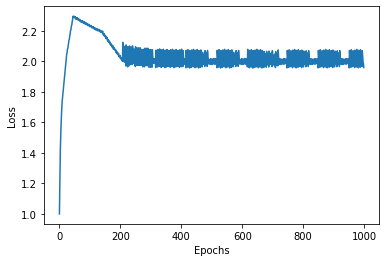

In [13]:
plt.plot(range(0,len(l)),l)
plt.xlabel("Epochs")
plt.rcParams["figure.figsize"] = (10,6)
plt.ylabel("Loss")

### The loss never settled 

#Step 4:After training is finished,
##report the calculated values of w and b (as defined in the course slides)

##If you implemented a hard-margin SVM, then in your scatterplot denote with filled circles ALL the support vectors, and with empty circles the rest of the points

##in your scatterplot draw the separating hyperplane

##Show exactly how your trained SVM decides the class of the test datapoint and what class it assigns it in

In [14]:
print(f"Weight:{w} Bias: {b}")

Weight:[[ 0.02246194 -0.01365085]] Bias: 1.0460000000000313


### test SVM (iteration 1) with (4,4)

In [15]:
test = (4,4)
svc.predict(test)

1.0

In [16]:
svc.predict(X.to_numpy())

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

###**looks like train data results are wrong ( training is NOT happening properly)**

#hyperplane

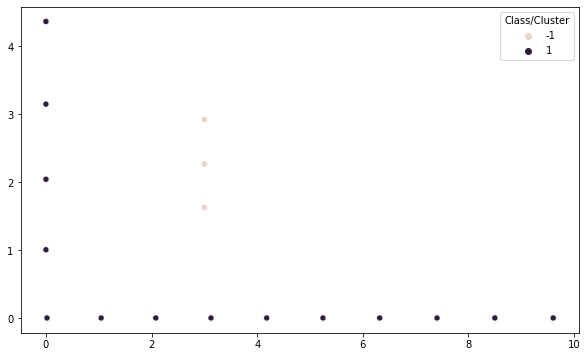

In [17]:
sns.scatterplot(x=X[:-1].values[:,0], 
                y=X[:-1].values[:, 1], 
                hue=y[:-1]);

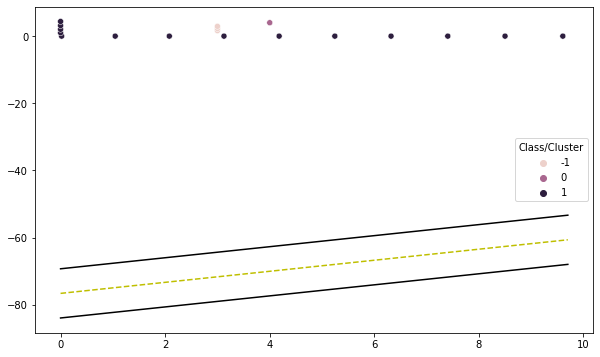

In [18]:
import seaborn as sns

def visualize_svm():
    """
    Plots the SVM decision boundary and support vectors.

    """
    # Plot data points
    sns.scatterplot(x=X.values[:,0], y=X.values[:, 1], hue=y)

    # Define hyperplane function
    def hyperplane(x, w, b, v):
        return -(w[0][0]*x-b+v) / w[0][1]

    # Set the range of data points to plot
    datarange = (min(X.iloc[:,0])*0.99, max(X.iloc[:,0])*1.01)
    hyp_x_min = datarange[0]
    hyp_x_max = datarange[1]

    # Plot positive support vector hyperplane
    psv1 = hyperplane(hyp_x_min, w, b, 0.1)
    psv2 = hyperplane(hyp_x_max, w, b, 0.1)
    plt.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')

    # Plot negative support vector hyperplane
    nsv1 = hyperplane(hyp_x_min, w, b, -0.1)
    nsv2 = hyperplane(hyp_x_max, w, b, -0.1)
    plt.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')

    # Plot decision boundary
    db1 = hyperplane(hyp_x_min, w, b, 0)
    db2 = hyperplane(hyp_x_max, w, b, 0)
    plt.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')

    # Show the plot
    plt.show()

visualize_svm()


##  **the hyper plane seems categprize all values as 1**

# Step 5: Define the mapping [a, b] -> [a, b, 2*a*b/(a+b)] and transform all datapoints accordingly. Then repeat steps 1-4 for the transformed dataset. What do you observe? Explain if and why your SVM benefitted from this transformation. 

## defining mapping

In [19]:

X['Feature 3']=X.apply(lambda x: 2*x['Feature 1']*x["Feature 2"]/(x['Feature 1']+x["Feature 2"]),axis=1)#2*a*b/(a+b)
print(X.shape)
X

(18, 3)


,Feature 1,Feature 2,Feature 3
0,0.020,0.000000,0.000000
1,1.045,0.000000,0.000000
2,2.080,0.000000,0.000000
3,3.125,0.000000,0.000000
4,4.180,0.000000,0.000000
5,5.245,0.000000,0.000000
6,6.320,0.000000,0.000000
7,7.405,0.000000,0.000000
8,8.500,0.000000,0.000000
9,9.605,0.000000,0.000000


#train with feature 3

In [20]:
w,b,l=svc.fit(X[:-1].to_numpy(),y[:-1].to_numpy()) # train everything except last row

Text(0, 0.5, 'Loss')

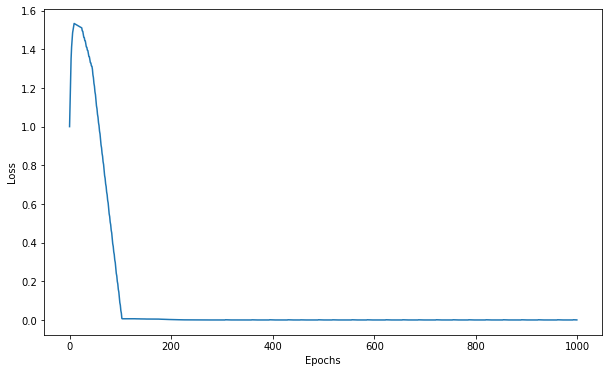

In [21]:
plt.plot(range(0,len(l)),l)
plt.xlabel("Epochs")
plt.rcParams["figure.figsize"] = (10,6)
plt.ylabel("Loss")

In [22]:
print(f"Weight:{w} Bias: {b}")

Weight:[[ 0.02159314  0.00297693 -0.96020703]] Bias: 1.0070000000000254


In [23]:
svc.predict(X.to_numpy())

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1., -1., -1., -1.])

## predicting test data (4,4)

In [24]:
test = (4,4,4) # feature 3 of test data(4,4) is 4 hence (4,4,4)
svc.predict(test)

-1.0

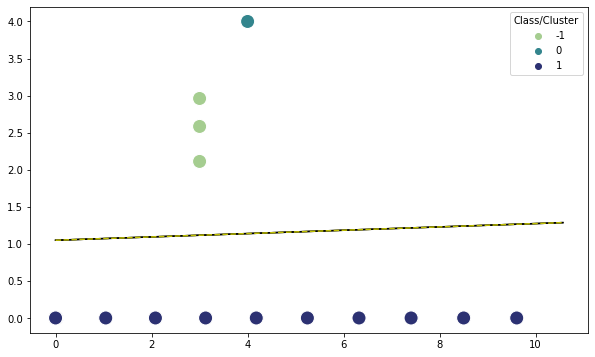

In [25]:
def visualize():
    # Visualize the data points and the decision boundary
    sns.scatterplot(x=X.values[:,0], 
                    y=X.values[:, 2], 
                    hue=y,
                    markers=['o','x','1'],
                    s=200,
                    palette='crest')

    # Define the hyperplane function as (w.x+b)/|w|
    def hyperplane(x, w, b):
        return (-w[0][0]*x-b) / w[0][2]

    # Set the data range for the plot
    datarange = (min(X.iloc[:,0])*0.9,max(X.iloc[:,0])*1.1)
    hyp_x_min = datarange[0]
    hyp_x_max = datarange[1]

    # Plot the positive support vector hyperplane
    psv1 = hyperplane(hyp_x_min, w, b)
    psv2 = hyperplane(hyp_x_max, w, b)
    plt.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

    # Plot the negative support vector hyperplane
    nsv1 = hyperplane(hyp_x_min, w, b)
    nsv2 = hyperplane(hyp_x_max, w, b)
    plt.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

    # Plot the decision boundary
    db1 = hyperplane(hyp_x_min, w, b)
    db2 = hyperplane(hyp_x_max, w, b)
    plt.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

    # Show the plot
    plt.show()
visualize()

# We get proper result with feature 3
# The main problem with first iteration is that the weight were properly distributed among the features and it might have worked with Poly SVM.
# adding feature 3 give us a good linearhyper plane which seperates the -1 and 1 clearly as shown in the plot.
# Feature 3 has higher weight (dot product) which will also help with classification.